## Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Reading the calories burnt dataset which was downloaded from Kaggle

In [3]:
exercise = pd.read_csv("C:\\Users\\harip\\Downloads\\calories\\exercise.csv")

In [4]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


**Encoding the qualitative feature**

In [5]:
exercise = pd.get_dummies(exercise, columns = ['Gender'])

In [6]:
exercise.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female,Gender_male
0,14733363,68,190.0,94.0,29.0,105.0,40.8,0,1
1,14861698,20,166.0,60.0,14.0,94.0,40.3,1,0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,0,1
3,16180408,34,179.0,71.0,13.0,100.0,40.5,1,0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,1,0


In [7]:
exercise.drop(['Gender_male'],axis=1,inplace = True)

In [8]:
exercise.tail()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female
14995,15644082,20,193.0,86.0,11.0,92.0,40.4,1
14996,17212577,27,165.0,65.0,6.0,85.0,39.2,1
14997,17271188,43,159.0,58.0,16.0,90.0,40.1,1
14998,18643037,78,193.0,97.0,2.0,84.0,38.3,0
14999,11751526,63,173.0,79.0,18.0,92.0,40.5,0


**Combining the dependent and independant variables into one data frame**

In [9]:
calories = pd.read_csv("C:\\Users\\harip\\Downloads\\calories\\calories.csv")
exercise['Calories'] = calories.Calories

In [10]:
exercise.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female,Calories
0,14733363,68,190.0,94.0,29.0,105.0,40.8,0,231.0
1,14861698,20,166.0,60.0,14.0,94.0,40.3,1,66.0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,0,26.0
3,16180408,34,179.0,71.0,13.0,100.0,40.5,1,71.0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,1,35.0


In [11]:
data = exercise.drop(['Calories'],axis = 1)
response = exercise['Calories']

In [12]:
data.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female
0,14733363,68,190.0,94.0,29.0,105.0,40.8,0
1,14861698,20,166.0,60.0,14.0,94.0,40.3,1
2,11179863,69,179.0,79.0,5.0,88.0,38.7,0
3,16180408,34,179.0,71.0,13.0,100.0,40.5,1
4,17771927,27,154.0,58.0,10.0,81.0,39.8,1


**Plotting a heatmap to get the amount of correlation between different variables**

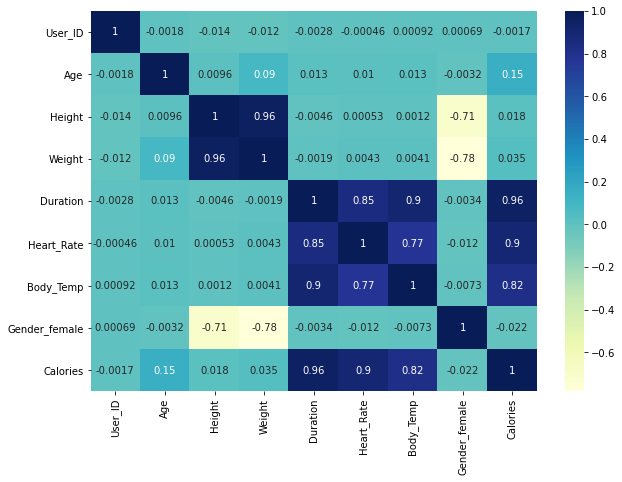

In [13]:
plt.figure(figsize = (10,7))
sb.heatmap(exercise.corr(),cmap="YlGnBu", annot=True)
plt.show()

**From the above heatmap, we can conclude the following about collinearity:**
- There is a strong positive correlation of 0.96 between height and weight
- There is a strong negative correlation of 0.71 between gender and height
- There is a strong negative correlation of 0.78 between gender and weight
- There is a strong positive correlation of 0.9 between duration and body temperature
- There is a strong positive correlation of 0.85 between duration and heart rate
- There is a strong positive correlation of 0.77 between body temperature and heart rate

But this heat map doesn't talk about the relationship between more than two variables i.e. about Multicollinearity. For this the Variance Inflation Factor for each feature has to be found out!

### Detecting Multicollinearity by using the Variance Inflation Factor for the current dataset

In [14]:
new_df = pd.DataFrame()

In [15]:
new_df['Feature name'] = data.columns

In [16]:
new_df['Variance Inflation Factor'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]

In [17]:
new_df

,Feature name,Variance Inflation Factor
0,User_ID,28.153548
1,Age,8.219227
2,Height,2043.980465
3,Weight,466.326327
4,Duration,14.090417
5,Heart_Rate,362.033366
6,Body_Temp,1088.125111
7,Gender_female,5.678566


The VIF is very high for all the variables!

### Dropping the User_ID, Age, Height, weight and gender column and checking the VIF 

In [18]:
data_new = data.drop(['User_ID','Age','Height','Weight','Gender_female'],axis=1)

In [19]:
data_new.head()

,Duration,Heart_Rate,Body_Temp
0,29.0,105.0,40.8
1,14.0,94.0,40.3
2,5.0,88.0,38.7
3,13.0,100.0,40.5
4,10.0,81.0,39.8


In [20]:
new_df1 = pd.DataFrame()
new_df1['Feature name'] = data_new.columns
new_df1['Variance Inflation Factor'] = [variance_inflation_factor(data_new.values, i)for i in range(len(data_new.columns))]

In [21]:
new_df1

,Feature name,Variance Inflation Factor
0,Duration,12.757516
1,Heart_Rate,361.715242
2,Body_Temp,275.015758


By dropping the multicollinear variables the VIF of :
- Duration has come down by 9.5%, 
- Heart_rate has come down by 0.08%,
- Body_Temp has come down by 75%

Though for Duration and Body_Temp features there is a drastic decrease in the VIF, still the magnitude is very high, indicating the presence of Multicollinearity!

## Using the principal component analysis to reduce the multicollinearity further
**Using the whole dataset without dropping any variables**

In [22]:
independent_variable_data = data
response_data = response

In [23]:
independent_variable_data.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female
0,14733363,68,190.0,94.0,29.0,105.0,40.8,0
1,14861698,20,166.0,60.0,14.0,94.0,40.3,1
2,11179863,69,179.0,79.0,5.0,88.0,38.7,0
3,16180408,34,179.0,71.0,13.0,100.0,40.5,1
4,17771927,27,154.0,58.0,10.0,81.0,39.8,1


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(independent_variable_data, response_data,test_size=0.25,random_state = 42)

**Scaling the data before dimensionally reducing it**

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

In [26]:
from sklearn.decomposition import PCA

Taking a random number of principal components, say 5 in number

In [27]:
pca = PCA(n_components = 5)
pca.fit(x_train_std)
x_train_std_transformed = pca.transform(x_train_std)

In [28]:
x_train_std

array([[ 0.48114958,  0.36688558, -0.09711399, ...,  1.4139516 ,
         0.99794857, -1.0101852 ],
       [ 0.71686292, -0.28231854,  0.11378603, ...,  1.20452693,
         0.74176946, -1.0101852 ],
       [ 1.2924333 ,  0.89805259, -0.167414  , ..., -1.62270611,
        -0.92339476, -1.0101852 ],
       ...,
       [ 1.0275264 ,  0.83903403,  1.02768614, ..., -0.57558276,
        -0.66721565, -1.0101852 ],
       [-0.9829165 , -0.45937421, -0.02681399, ...,  0.15740358,
         0.22941124, -1.0101852 ],
       [ 1.46927852, -0.99054122,  0.53558608, ..., -0.47087043,
         0.6136799 , -1.0101852 ]])

In [29]:
df_new = pd.DataFrame()
df_new['Feature name'] = ['PC 1', 'PC 2', 'PC 3','PC 4','PC 5']
df_new['Variance Inflation Factor'] = [variance_inflation_factor(x_train_std_transformed,i) for i in range(x_train_std_transformed.shape[1])]

In [30]:
df_new

,Feature name,Variance Inflation Factor
0,PC 1,1.0
1,PC 2,1.0
2,PC 3,1.0
3,PC 4,1.0
4,PC 5,1.0


**Even after taking a random number of principal components, the VIF has tremendously come down in magnitude and is now having the least possible value!**